In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json 

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '0eb49e95-a173-49f2-9d30-619150faa4b8',
    }
session = Session()
session.headers.update(headers)

try:
    response = session.get(url,params=parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError,Timeout,TooManyRedirects)as e:
    print(e)
    
#Note:
#if your code doesn't work I had to go raise the limit of my jupyter notebook in anaconda prompt
#I had to put 'jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10' then I had to close my open window
# and reopen a new one for the change to take effect and the code to work 


In [6]:
type(data)

dict

In [24]:
#We'll use pandas to conver the data into a more readable format 
import pandas as pd 

#This allows you to see all the columns!
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
#This is what makes the data look like a more readable file 

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9986,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.929622e+07,1.929622e+07,NaN,1,NaN,NaN,None,2023-02-19T22:11:00.000Z,24542.928389,2.497116e+10,13.7163,0.016507,-0.357954,13.124481,9.736909,46.165843,56.625916,4.735857e+11,42.4545,5.154015e+11,None,2023-02-19T22:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 16:12:42.437042
1,1027,Ethereum,ETH,ethereum,6476,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-19T22:11:00.000Z,1686.475740,6.797824e+09,15.0236,0.070183,-0.179857,12.256591,2.888048,39.168206,53.372390,2.063806e+11,18.5026,2.063806e+11,None,2023-02-19T22:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 16:12:42.437042
2,825,Tether,USDT,tether,47819,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.040321e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-19T22:11:00.000Z,1.000239,3.841241e+10,15.7692,-0.002046,0.004428,0.005756,0.002146,0.016607,0.122245,7.042003e+10,6.3123,7.315925e+10,None,2023-02-19T22:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-19 16:12:42.437042
3,1839,BNB,BNB,bnb,1193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.578974e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-19T22:11:00.000Z,313.619843,5.158836e+08,6.4262,0.402523,-0.681807,-0.161730,3.603778,26.957348,23.823956,4.951975e+10,4.4388,6.272397e+10,None,2023-02-19T22:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 16:12:42.437042
4,3408,USD Coin,USDC,usd-coin,10189,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.186557e+10,4.186557e+10,NaN,5,NaN,NaN,None,2023-02-19T22:11:00.000Z,1.000083,3.184536e+09,9.1372,0.000409,-0.001932,0.017666,-0.026328,0.000968,-0.010738,4.186906e+10,3.7537,4.186906e+10,None,2023-02-19T22:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-19 16:12:42.437042
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,NaN,NaN,None,2023-02-19T22:11:00.000Z,0.388954,6.646494e+08,25.1826,0.253121,-1.229597,3.650755,-5.431903,12.498931,8.960396,1.975852e+10,1.7714,3.889543e+10,None,2023-02-19T22:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 16:12:42.437042
6,2010,Cardano,ADA,cardano,652,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.464667e+10,3.550287e+10,NaN,7,NaN,NaN,None,2023-02-19T22:11:00.000Z,0.402673,3.370160e+08,2.7866,0.353532,-0.600631,11.473586,12.266280,60.028996,33.147046,1.395128e+10,1.2506,1.812029e+10,None,2023-02-19T22:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 16:12:42.437042
7,4687,Binance USD,BUSD,binance-usd,6235,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.323882e+10,1.323882e+10,NaN,8,NaN,NaN,None,2023-02-19T22:11:00.000Z,1.000134,7.008872e+09,17.0719,-0.018867,0.007017,0.013769,0.033507,0.000403,-0.014460,1.324060e+10,1.1872,1.324060e+10,None,2023-02-19T22:11:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-19 16:12:42.437042
8,3890,Polygon,MATIC,polygon,590,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,9,NaN,NaN,No

In [25]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0eb49e95-a173-49f2-9d30-619150faa4b8',
    }
    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url,params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError,Timeout,TooManyRedirects)as e:
        print(e)
    
#Note:
#if your code doesn't work I had to go raise the limit of my jupyter notebook in anaconda prompt
#I had to put 'jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10' then I had to close my open window
# and reopen a new one for the change to take effect and the code to work 

    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df 
    
    if not os.path.isfile(r'C:\Users\andyl\Desktop\Data\CoinCap_Data\API_Data.csv'): 
        df.to_csv(r'C:\Users\andyl\Desktop\Data\CoinCap_Data\API_Data.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\andyl\Desktop\Data\CoinCap_Data\API_Data.csv', mode='a',header=False)

In [105]:
import os
from time import time
from time import sleep 

for i in range(5):
    api_runner()
    print('API Runner has finished pulling data')
    sleep(60) #Wait 1 min befor it does another pull 



API Runner has finished pulling data
API Runner has finished pulling data
API Runner has finished pulling data
API Runner has finished pulling data
API Runner has finished pulling data


In [106]:
df72 = pd.read_csv(r'C:\Users\andyl\Desktop\Data\CoinCap_Data\API_Data.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9986,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19296218.00000,19296218.00000,NaN,1,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,24422.92066,25306235466.24742,26.92660,-0.49092,-0.87321,12.22838,7.85147,45.39790,54.60525,471270001185.94928,42.31460,512881333788.04999,NaN,2023-02-19T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
1,1,1027,Ethereum,ETH,ethereum,6477,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,1685.77786,6911165612.39254,25.10110,-0.11046,-0.27957,11.47820,1.75744,39.03990,51.92275,206295154619.55209,18.52120,206295154619.54999,NaN,2023-02-19T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
2,2,825,Tether,USDT,tether,47823,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,70403206010.69595,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,1.00024,38879778179.97321,25.00770,-0.00260,0.00689,0.00173,0.00669,0.01678,0.11469,70419968508.88895,6.32230,73159180850.99001,NaN,2023-02-19T23:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-19 17:34:13.138054
3,3,1839,BNB,BNB,bnb,1193,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,157897373.69505,159979963.59043,NaN,4,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,313.14856,521032026.79386,11.59200,-0.12426,-0.94278,-0.24226,2.75824,26.81262,23.04510,49445335231.79573,4.43920,62629712039.78000,NaN,2023-02-19T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
4,4,3408,USD Coin,USDC,usd-coin,10189,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41865571512.96381,41865571512.96381,NaN,5,NaN,NaN,NaN,2023-02-19T23:32:00.000Z,0.99995,3200470032.59899,16.11190,-0.00645,-0.00416,-0.00198,-0.01184,0.00192,-0.03240,41863389861.53953,3.75850,41863389861.54000,NaN,2023-02-19T23:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-19 17:34:13.138054
5,5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50799084881.00000,99989130718.00000,NaN,6,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,0.38762,708352422.59811,40.56160,-0.26358,-1.78624,3.36857,-5.95652,12.05934,5.98615,19690861413.23881,1.76780,38762236483.92000,NaN,2023-02-19T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
6,6,2010,Cardano,ADA,cardano,652,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34646668501.89800,35502866590.52700,NaN,7,NaN,NaN,NaN,2023-02-19T23:32:00.000Z,0.40190,341832728.28155,8.41210,-0.31018,-1.03144,10.36189,11.19541,59.07784,31.76543,13924391247.63977,1.25010,18085363852.79000,NaN,2023-02-19T23:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
7,7,4687,Binance USD,BUSD,binance-usd,6235,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,13238824105.99338,13238824105.99338,NaN,8,NaN,NaN,NaN,2023-02-19T23:32:00.000Z,1.00017,7123595341.60425,24.51690,-0.00380,0.01226,0.01576,0.02191,0.01924,-0.06695,13241045941.67146,1.18860,13241045941.67000,NaN,2023-02-19T23:32:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,202

In [107]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [108]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9986,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19296218.00000,19296218.00000,NaN,1,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,24422.92066,25306235466.24742,26.92660,-0.49092,-0.87321,12.22838,7.85147,45.39790,54.60525,471270001185.94928,42.31460,512881333788.04999,NaN,2023-02-19T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
1,1,1027,Ethereum,ETH,ethereum,6477,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,1685.77786,6911165612.39254,25.10110,-0.11046,-0.27957,11.47820,1.75744,39.03990,51.92275,206295154619.55209,18.52120,206295154619.54999,NaN,2023-02-19T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
2,2,825,Tether,USDT,tether,47823,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,70403206010.69595,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,1.00024,38879778179.97321,25.00770,-0.00260,0.00689,0.00173,0.00669,0.01678,0.11469,70419968508.88895,6.32230,73159180850.99001,NaN,2023-02-19T23:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-19 17:34:13.138054
3,3,1839,BNB,BNB,bnb,1193,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,157897373.69505,159979963.59043,NaN,4,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,313.14856,521032026.79386,11.59200,-0.12426,-0.94278,-0.24226,2.75824,26.81262,23.04510,49445335231.79573,4.43920,62629712039.78000,NaN,2023-02-19T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
4,4,3408,USD Coin,USDC,usd-coin,10189,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41865571512.96381,41865571512.96381,NaN,5,NaN,NaN,NaN,2023-02-19T23:32:00.000Z,0.99995,3200470032.59899,16.11190,-0.00645,-0.00416,-0.00198,-0.01184,0.00192,-0.03240,41863389861.53953,3.75850,41863389861.54000,NaN,2023-02-19T23:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-19 17:34:13.138054
5,5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50799084881.00000,99989130718.00000,NaN,6,NaN,NaN,NaN,2023-02-19T23:33:00.000Z,0.38762,708352422.59811,40.56160,-0.26358,-1.78624,3.36857,-5.95652,12.05934,5.98615,19690861413.23881,1.76780,38762236483.92000,NaN,2023-02-19T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
6,6,2010,Cardano,ADA,cardano,652,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34646668501.89800,35502866590.52700,NaN,7,NaN,NaN,NaN,2023-02-19T23:32:00.000Z,0.40190,341832728.28155,8.41210,-0.31018,-1.03144,10.36189,11.19541,59.07784,31.76543,13924391247.63977,1.25010,18085363852.79000,NaN,2023-02-19T23:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-19 17:34:13.138054
7,7,4687,Binance USD,BUSD,binance-usd,6235,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,13238824105.99338,13238824105.99338,NaN,8,NaN,NaN,NaN,2023-02-19T23:32:00.000Z,1.00017,7123595341.60425,24.51690,-0.00380,0.01226,0.01576,0.02191,0.01924,-0.06695,13241045941.67146,1.18860,13241045941.67000,NaN,2023-02-19T23:32:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,202

In [109]:
df3 = df72.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.volume_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.volume_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.25005,32.05389,12.15626,8.17893,45.17356,54.08174
Ethereum,-0.05932,28.77730,11.32506,1.68489,38.91606,51.60753
Tether,-0.00073,28.74341,0.00168,0.00589,0.01672,0.11749
BNB,-0.03393,10.23810,0.18056,3.24368,26.92801,22.50443
USD Coin,-0.00253,18.10229,0.00479,-0.00735,-0.00475,-0.03114
XRP,0.05451,46.27439,3.29226,-5.45519,12.26922,6.28319
Cardano,-0.13085,11.34480,10.48002,10.69650,58.93310,31.20303
Binance USD,-0.00300,28.48857,0.04244,0.02599,0.03706,-0.07665
Polygon,0.02005,-4.36809,20.42812,45.68437,88.05458,84.43727


In [110]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.25005
             quote.USD.volume_change_24h     32.05389
             quote.USD.percent_change_7d     12.15626
             quote.USD.percent_change_30d     8.17893
             quote.USD.percent_change_60d    45.17356
             quote.USD.percent_change_90d    54.08174
Ethereum     quote.USD.percent_change_1h     -0.05932
             quote.USD.volume_change_24h     28.77730
             quote.USD.percent_change_7d     11.32506
             quote.USD.percent_change_30d     1.68489
             quote.USD.percent_change_60d    38.91606
             quote.USD.percent_change_90d    51.60753
Tether       quote.USD.percent_change_1h     -0.00073
             quote.USD.volume_change_24h     28.74341
             quote.USD.percent_change_7d      0.00168
             quote.USD.percent_change_30d     0.00589
             quote.USD.percent_change_60d     0.01672
             quote.USD.percent_change_90

In [111]:
type(df4)

pandas.core.series.Series

In [112]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.25005
            quote.USD.volume_change_24h   32.05389
            quote.USD.percent_change_7d   12.15626
            quote.USD.percent_change_30d   8.17893
            quote.USD.percent_change_60d  45.17356
            quote.USD.percent_change_90d  54.08174
Ethereum    quote.USD.percent_change_1h   -0.05932
            quote.USD.volume_change_24h   28.77730
            quote.USD.percent_change_7d   11.32506
            quote.USD.percent_change_30d   1.68489
            quote.USD.percent_change_60d  38.91606
            quote.USD.percent_change_90d  51.60753
Tether      quote.USD.percent_change_1h   -0.00073
            quote.USD.volume_change_24h   28.74341
            quote.USD.percent_change_7d    0.00168
            quote.USD.percent_change_30d   0.00589
            quote.USD.percent_change_60d   0.01672
            quote.USD.percent_change_90d   0.11749
BNB         quote.USD.percent_change_1h   -0.03393
            quote.USD.volume_change_24h   10.23810
            quote.USD.percent_change_7d    0.18056
            quote.USD.percent_change_30d   3.24368
            quote.USD.percent_change_60d  26.92801
            quote.USD.percent_change_90d  22.50443
USD Coin    quote.USD.percent_change_1h   -0.00253
            quote.USD.volume_change_24h   18.10229
            quote.USD.percent_change_7d    0.00479
            quote.USD.percent_change_30d  -0.00735
            quote.USD.percent_change_60d  -0.00475
            quote.USD.percent_change_90d  -0.03114
XRP         quote.USD.percent_change_1h    0.05451
            quote.USD.volume_change_24h   46.27439
            quote.USD.percent_change_7d    3.29226
            quote.USD.percent_change_30d  -5.45519
            quote.USD.percent_change_60d  12.26922
            quote.USD.percent_change_90d   6.28319
Cardano     quote.USD.percent_change_1h   -0.13085
            quote.USD.volume_change_24h   11.34480
            quote.USD.percent_change_7d   10.48002
            quote.USD.percent_change_30d  10.69650
            quote.USD.percent_change_60d  58.93310
            quote.USD.percent_change_90d  31.20303
Binance USD quote.USD.percent_change_1h   -0.00300
            quote.USD.volume_change_24h   28.48857
            quote.USD.percent_change_7d    0.04244
            quote.USD.percent_change_30d   0.02599
            quote.USD.percent_change_60d   0.03706
            quote.USD.percent_change_90d  -0.07665
Polygon     quote.USD.percent_change_1h    0.02005
            quote.USD.volume_change_24h   -4.36809
            quote.USD.percent_change_7d   20.42812
            quote.USD.percent_change_30d  45.68437
            quote.USD.percent_change_60d  88.05458
            quote.USD.percent_change_90d  84.43727
Dogecoin    quote.USD.percent_change_1h    0.13654
            quote.USD.volume_change_24h   26.65957
            quote.USD.percent_change_7d    6.48962
            quote.USD.percent_change_30d   1.49143
            quote.USD.percent_change_60d  18.64566
            quote.USD.percent_change_90d  16.14271
Solana      quote.USD.percent_change_1h   -1.02774
            quote.USD.volume_change_24h  171.43917
            quote.USD.percent_change_7d   16.58123
            quote.USD.percent_change_30d  -0.57130
            quote.USD.percent_change_60d 106.08260
            quote.USD.percent_change_90d 109.02749
Polkadot    quote.USD.percent_change_1h    0.10606
            quote.USD.volume_change_24h   71.83214
            quote.USD.percent_change_7d   21.49930
            quote.USD.percent_change_30d  20.44512
            quote.USD.percent_change_60d  67.65058
            quote.USD.percent_change_90d  43.57666
Shiba Inu   quote.USD.percent_change_1h    0.12218
            quote.USD.volume_change_24h   98.07543
            quote.USD.percent_change_7d    4.76606
            quote.USD.percent_change_30d  11.13151
            quote.USD.percent_change_60d  63.76619
            quo

In [120]:
rows = len(df5)
index = pd.Index(range(rows))

df6=df5.set_index(index)

#It looks wonky after you set the index so resetting it gives you the nice table below
df6=df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25005
1,Bitcoin,quote.USD.volume_change_24h,32.05389
2,Bitcoin,quote.USD.percent_change_7d,12.15626
3,Bitcoin,quote.USD.percent_change_30d,8.17893
4,Bitcoin,quote.USD.percent_change_60d,45.17356
5,Bitcoin,quote.USD.percent_change_90d,54.08174
6,Ethereum,quote.USD.percent_change_1h,-0.05932
7,Ethereum,quote.USD.volume_change_24h,28.77730
8,Ethereum,quote.USD.percent_change_7d,11.32506
9,Ethereum,quote.USD.percent_change_30d,1.68489


In [121]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25005
1,Bitcoin,quote.USD.volume_change_24h,32.05389
2,Bitcoin,quote.USD.percent_change_7d,12.15626
3,Bitcoin,quote.USD.percent_change_30d,8.17893
4,Bitcoin,quote.USD.percent_change_60d,45.17356
5,Bitcoin,quote.USD.percent_change_90d,54.08174
6,Ethereum,quote.USD.percent_change_1h,-0.05932
7,Ethereum,quote.USD.volume_change_24h,28.77730
8,Ethereum,quote.USD.percent_change_7d,11.32506
9,Ethereum,quote.USD.percent_change_30d,1.68489


In [122]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.volume_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.25005
1,Bitcoin,24h,32.05389
2,Bitcoin,7d,12.15626
3,Bitcoin,30d,8.17893
4,Bitcoin,60d,45.17356
5,Bitcoin,90d,54.08174
6,Ethereum,1hr,-0.05932
7,Ethereum,24h,28.77730
8,Ethereum,7d,11.32506
9,Ethereum,30d,1.68489


In [123]:
import seaborn as sns 
import matplotlib.pyplot as plt

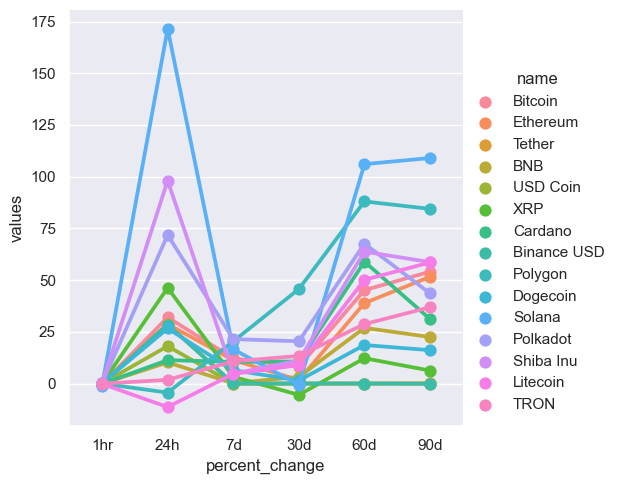

In [124]:
sns.catplot(x='percent_change',y='values',hue='name', data=df7, kind='point')
plt.show()

In [125]:
df8=df72[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")

df8

,name,quote.USD.price,timestamp
0,Bitcoin,24422.92066,2023-02-19 17:34:13.138054
15,Bitcoin,24418.02356,2023-02-19 17:35:13.531884
30,Bitcoin,24399.25410,2023-02-19 18:19:27.478432
45,Bitcoin,24405.46125,2023-02-19 18:20:27.878049
60,Bitcoin,24411.29619,2023-02-19 18:21:28.269486
75,Bitcoin,24411.95905,2023-02-19 18:22:28.673267
90,Bitcoin,24391.70928,2023-02-19 18:23:29.076539


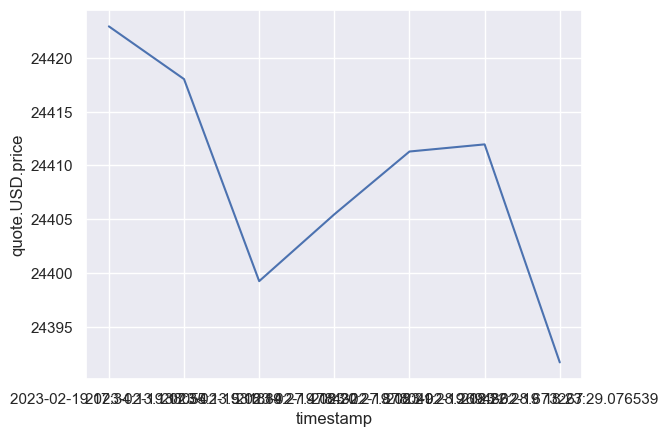

In [126]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp',y='quote.USD.price',data = df8)
plt.show()